In [54]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [55]:
biolord_suggestions = pd.read_csv('./suggestions_biolord_gs.csv')

In [56]:
biolord_suggestions.head()

,ner_method,bao_term,bao_link,partial_match,suggestions,embed_link,embed_term,embed_score,correct
0,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('2d structure prediction', 'http://www.bioass...",http://www.bioassayontology.org/bao#BAO_0002213,2d structure prediction,0.775073,0
1,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('2-d extent', 'http://purl.obolibrary.org/obo...",http://purl.obolibrary.org/obo/PATO_0001709,2-d extent,0.783654,0
2,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"(""zerner's intermediate neglect of differentia...",http://www.bioassayontology.org/bao#BAO_0002330,zerner's intermediate neglect of differential ...,0.819047,0
3,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,('edge detection is the process to identify re...,http://www.bioassayontology.org/bao#BAO_0040008,edge detection is the process to identify regi...,0.827010,0
4,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('edge detection', 'http://www.bioassayontolog...",http://www.bioassayontology.org/bao#BAO_0040008,edge detection,0.830894,0


In [57]:
biolord_suggestions['score'] = biolord_suggestions['embed_score'].apply(lambda x: 1-x)

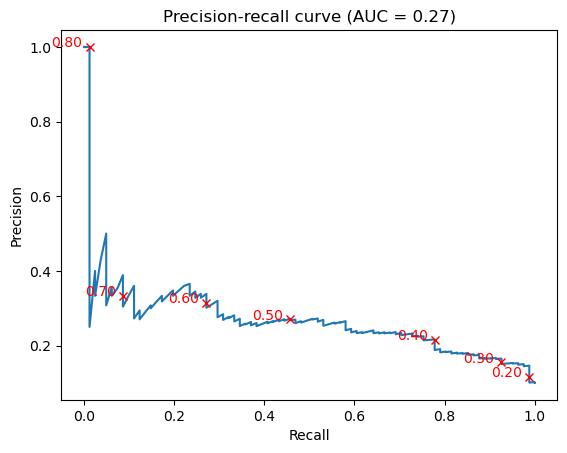

In [62]:
precision, recall, thresholds = precision_recall_curve(biolord_suggestions.correct, biolord_suggestions.score)
auc_pr = auc(recall, precision)

plt.figure()

# Plot precision-recall curve
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-recall curve (AUC = {auc_pr:.2f})')


# Annotating specific thresholds 
threshold_points = np.arange(0.2, 0.9, 0.1)
for threshold in threshold_points:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.annotate(f'{thresholds[idx]:.2f}', (recall[idx], precision[idx]), textcoords="offset points", xytext=(-5,0), ha='right', color='red')
    plt.plot(recall[idx], precision[idx], 'rx')


In [29]:
import seaborn as sns

In [31]:
biolord_suggestions['correct_binary'] = biolord_suggestions['correct'].apply(lambda x: True if x==1 else False)

In [34]:
biolord_suggestions.head()

,ner_method,bao_term,bao_link,partial_match,suggestions,embed_link,embed_term,embed_score,correct,score,correct_binary
0,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('2d structure prediction', 'http://www.bioass...",http://www.bioassayontology.org/bao#BAO_0002213,2d structure prediction,0.775073,0,0.224927,False
1,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('2-d extent', 'http://purl.obolibrary.org/obo...",http://purl.obolibrary.org/obo/PATO_0001709,2-d extent,0.783654,0,0.216346,False
2,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"(""zerner's intermediate neglect of differentia...",http://www.bioassayontology.org/bao#BAO_0002330,zerner's intermediate neglect of differential ...,0.819047,0,0.180953,False
3,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,('edge detection is the process to identify re...,http://www.bioassayontology.org/bao#BAO_0040008,edge detection is the process to identify regi...,0.827010,0,0.172990,False
4,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('edge detection', 'http://www.bioassayontolog...",http://www.bioassayontology.org/bao#BAO_0040008,edge detection,0.830894,0,0.169106,False


<Axes: xlabel='correct_binary', ylabel='embed_score'>

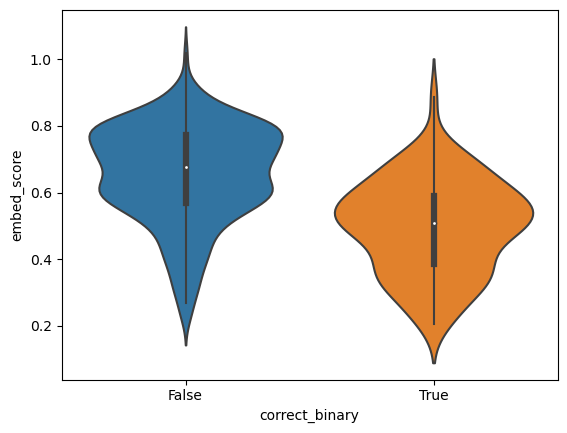

In [36]:
sns.violinplot(data=biolord_suggestions, y='embed_score', x='correct_binary')

In [38]:
len(biolord_suggestions['ner_method'].drop_duplicates())

130

In [39]:
len(biolord_suggestions['bao_link'].drop_duplicates())

54

In [48]:
biolord_suggestions.iloc[[0,18,25,34,78,123]]

,ner_method,bao_term,bao_link,partial_match,suggestions,embed_link,embed_term,embed_score,correct,score,correct_binary
0,2D-PAGE ANALYSIS,PAGE,http://www.bioassayontology.org/bao#BAO_0010019,False,"('2d structure prediction', 'http://www.bioass...",http://www.bioassayontology.org/bao#BAO_0002213,2d structure prediction,0.775073,0,0.224927,False
18,ALU-LTR PCR PROTOCOL BASED METHOD,real-time PCR,http://www.bioassayontology.org/bao#BAO_0002084,False,"('real-time pcr', 'http://www.bioassayontology...",http://www.bioassayontology.org/bao#BAO_0002084,real-time pcr,0.729989,1,0.270011,True
25,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,Annexin V apoptosis assay,http://www.bioassayontology.org/bao#BAO_0010265,True,"('fitc annexin v apoptosis detection', 'http:/...",http://www.bioassayontology.org/bao#BAO_0010265,fitc annexin v apoptosis detection,0.668229,1,0.331771,True
34,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,propidium iodide DNA staining,http://www.bioassayontology.org/bao#BAO_0002476,True,"('ip1 redistribution assay', 'http://www.bioas...",http://www.bioassayontology.org/bao#BAO_0002780,ip1 redistribution assay,0.781444,0,0.218556,False
78,ANNEXIN V-FITC/PROPIDIUM IODIDE STAINING BASED...,flow cytometry,http://www.bioassayontology.org/bao#BAO_0000005,True,('imagestreamx mark ii imaging flow cytometer'...,http://www.bioassayontology.org/bao#BAO_0002950,imagestreamx mark ii imaging flow cytometer,0.825559,0,0.174441,False
123,ANNEXIN V/PI STAINING-BASED FACS ANALYSIS,flow cytometry,http://www.bioassayontology.org/bao#BAO_0000005,True,"('fitc annexin v apoptosis detection', 'http:/...",http://www.bioassayontology.org/bao#BAO_0010265,fitc annexin v apoptosis detection,0.598611,0,0.401389,False


In [47]:
biolord_suggestions.loc[biolord_suggestions['correct']==1]

,ner_method,bao_term,bao_link,partial_match,suggestions,embed_link,embed_term,embed_score,correct,score,correct_binary
18,ALU-LTR PCR PROTOCOL BASED METHOD,real-time PCR,http://www.bioassayontology.org/bao#BAO_0002084,False,"('real-time pcr', 'http://www.bioassayontology...",http://www.bioassayontology.org/bao#BAO_0002084,real-time pcr,0.729989,1,0.270011,True
25,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,Annexin V apoptosis assay,http://www.bioassayontology.org/bao#BAO_0010265,True,"('fitc annexin v apoptosis detection', 'http:/...",http://www.bioassayontology.org/bao#BAO_0010265,fitc annexin v apoptosis detection,0.668229,1,0.331771,True
26,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,Annexin V apoptosis assay,http://www.bioassayontology.org/bao#BAO_0010265,True,"('annexin v fitc apoptosis detection', 'http:/...",http://www.bioassayontology.org/bao#BAO_0010265,annexin v fitc apoptosis detection,0.677093,1,0.322907,True
27,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,Annexin V apoptosis assay,http://www.bioassayontology.org/bao#BAO_0010265,True,"('annexin v fitc apoptosis assay', 'http://www...",http://www.bioassayontology.org/bao#BAO_0010265,annexin v fitc apoptosis assay,0.683645,1,0.316355,True
28,ANNEXIN V-FITC AND PI STAINING BASED FLOW CYTO...,Annexin V apoptosis assay,http://www.bioassayontology.org/bao#BAO_0010265,True,"('annexin v apoptosis assay', 'http://www.bioa...",http://www.bioassayontology.org/bao#BAO_0010265,annexin v apoptosis assay,0.710345,1,0.289655,True
...,...,...,...,...,...,...,...,...,...,...,...
775,TWO FOLD DILUTION METHOD,dilution method,http://www.bioassayontology.org/bao#BAO_0002418,False,"('dilution method', 'http://www.bioassayontolo...",http://www.bioassayontology.org/bao#BAO_0002418,dilution method,0.468009,1,0.531991,True
780,TWOFOLD DILUTION METHOD,dilution method,http://www.bioassayontology.org/bao#BAO_0002418,False,"('dilution method', 'http://www.bioassayontolo...",http://www.bioassayontology.org/bao#BAO_0002418,dilution method,0.427869,1,0.572131,True
785,VP-ITC MICROCALORIMETRY,isothermal titration calorimetry,http://www.bioassayontology.org/bao#BAO_0000428,True,"('isothermal titration calorimetry', 'http://w...",http://www.bioassayontology.org/bao#BAO_0000428,isothermal titration calorimetry,0.566334,1,0.433666,True
795,WESTERN BLOT METHOD,western blot,http://www.bioassayontology.org/bao#BAO_0002424,False,"('western blot', 'http://www.bioassayontology....",http://www.bioassayontology.org/bao#BAO_0002424,western blot,0.547552,1,0.452448,True
